In [50]:
import numpy as np
import pandas as pd  
import matplotlib.pyplot as plt 
import seaborn as sns   
from scipy.stats import shapiro, skew, kurtosis, probplot

In [51]:
path_to_file = 'petrol_consumption.csv'
df = pd.read_csv(path_to_file)
df.head()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.0,3571.0,1976.0,0.525,541
1,9.0,4092.0,1250.0,0.572,524
2,0.0,3865.0,1586.0,0.580,561
3,7.5,4870.0,2351.0,0.529,414
4,8.0,4399.0,431.0,0.544,410


In [52]:
print("Data has {} Rows and {} Colummns.".format(df.shape[0],df.shape[1])) 

Data has 48 Rows and 5 Colummns.


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Petrol_tax                    48 non-null     float64
 1   Average_income                47 non-null     float64
 2   Paved_Highways                46 non-null     float64
 3   Population_Driver_licence(%)  46 non-null     float64
 4   Petrol_Consumption            48 non-null     int64  
dtypes: float64(4), int64(1)
memory usage: 2.0 KB


In [54]:
df.isnull().sum()

Petrol_tax                      0
Average_income                  1
Paved_Highways                  2
Population_Driver_licence(%)    2
Petrol_Consumption              0
dtype: int64

In [55]:
all_nan_rows = df.isnull().all(axis=1)
print(all_nan_rows)

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
30    False
31    False
32    False
33    False
34    False
35    False
36    False
37    False
38    False
39    False
40    False
41    False
42    False
43    False
44    False
45    False
46    False
47    False
dtype: bool


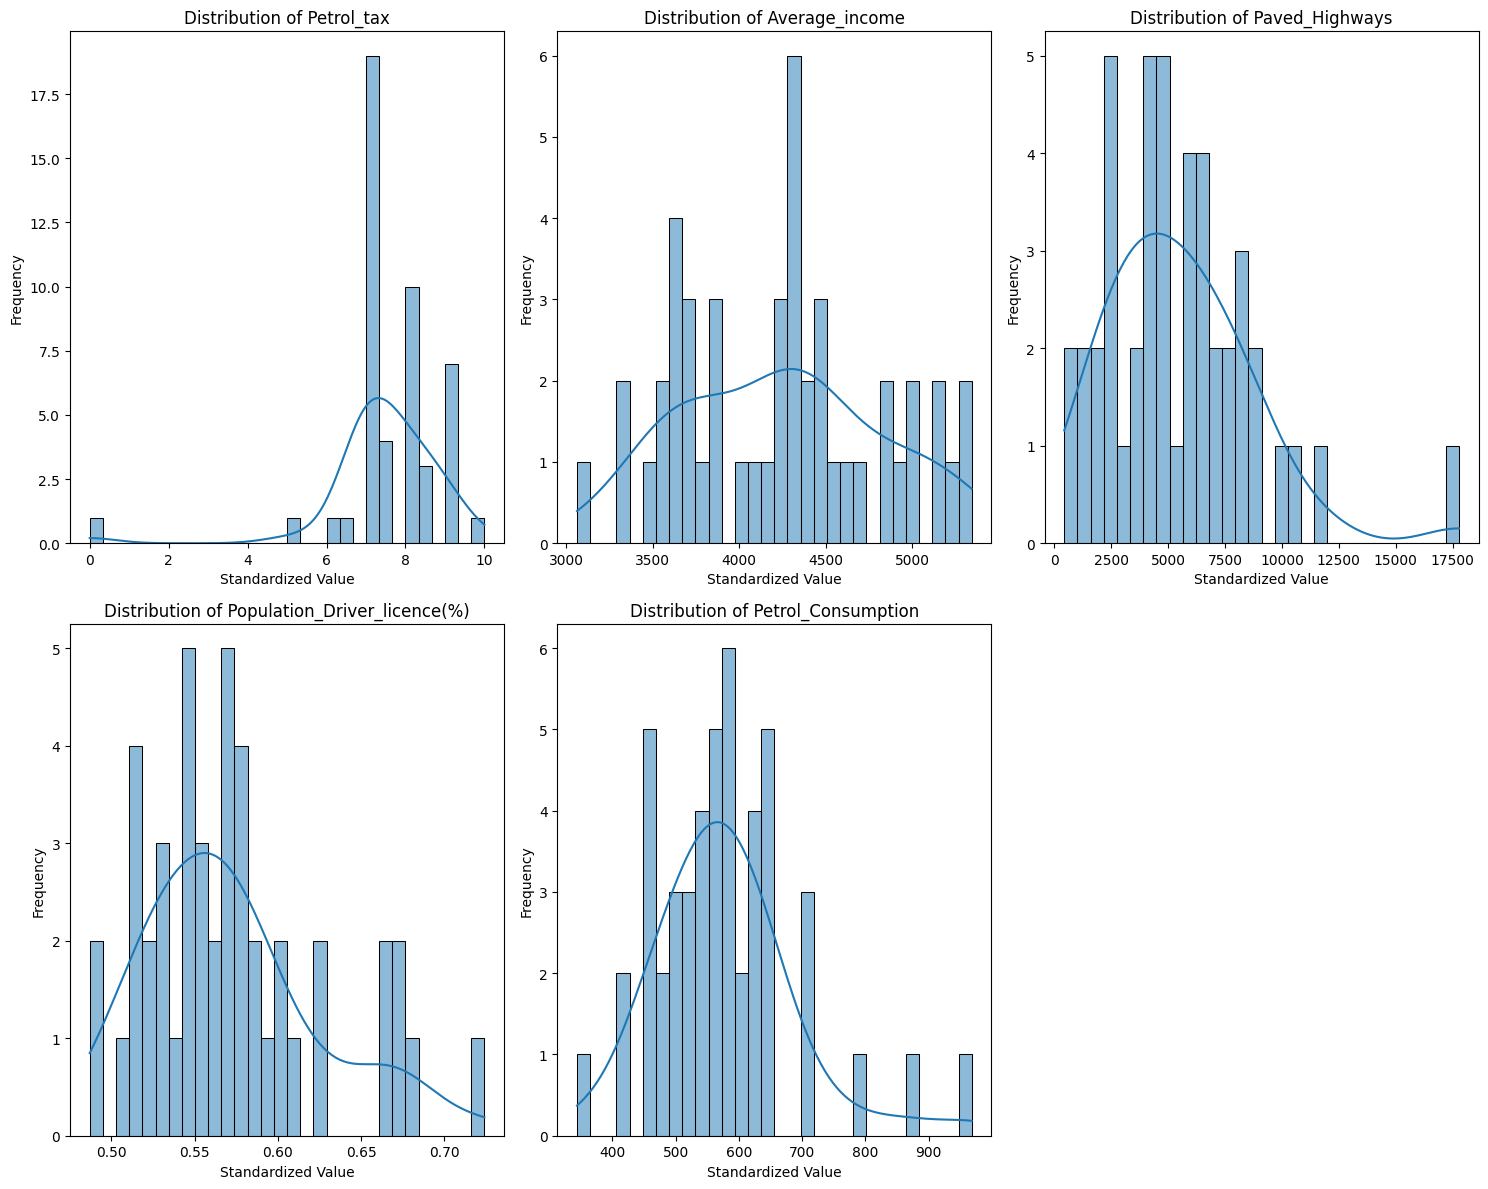

In [56]:
fig, axes = plt.subplots(nrows=len(df.columns)//3 + 1, ncols=3, figsize=(15, 12)) 
axes = axes.flatten() 
# Plot each column
for i, col in enumerate(df.columns):
    sns.histplot(df[col], kde=True, ax=axes[i], bins=30)
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel('Standardized Value')
    axes[i].set_ylabel('Frequency')

# Remove any empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

<Figure size 1000x600 with 0 Axes>

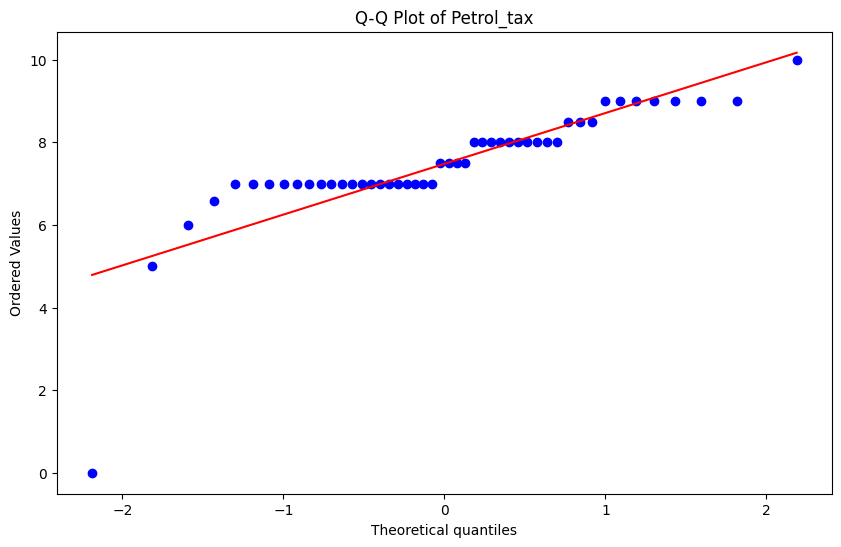

<Figure size 1000x600 with 0 Axes>

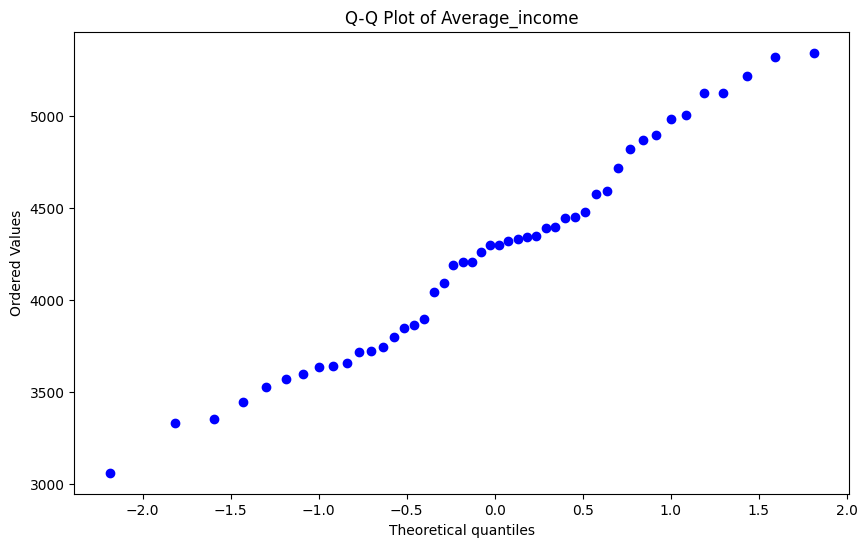

<Figure size 1000x600 with 0 Axes>

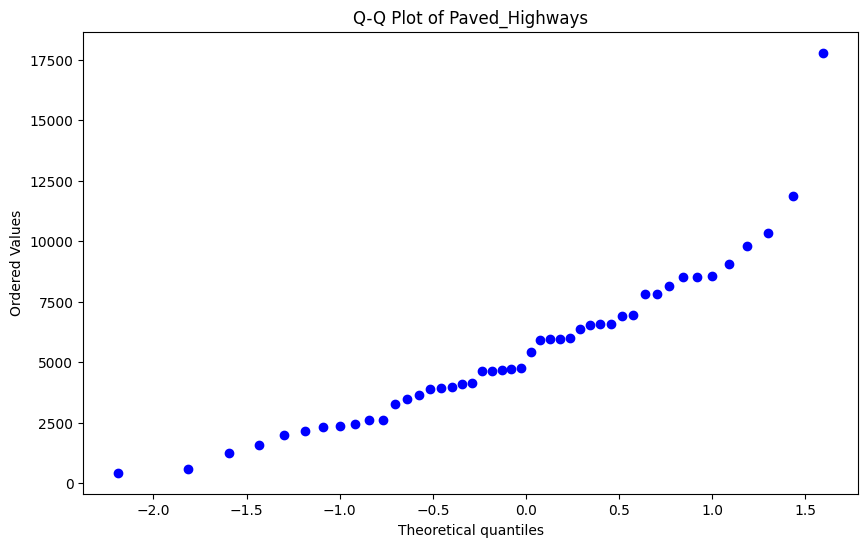

<Figure size 1000x600 with 0 Axes>

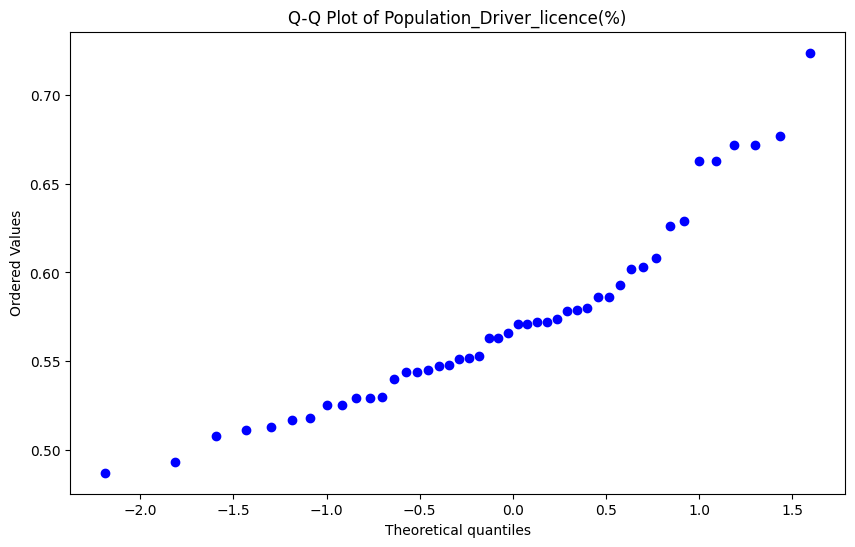

<Figure size 1000x600 with 0 Axes>

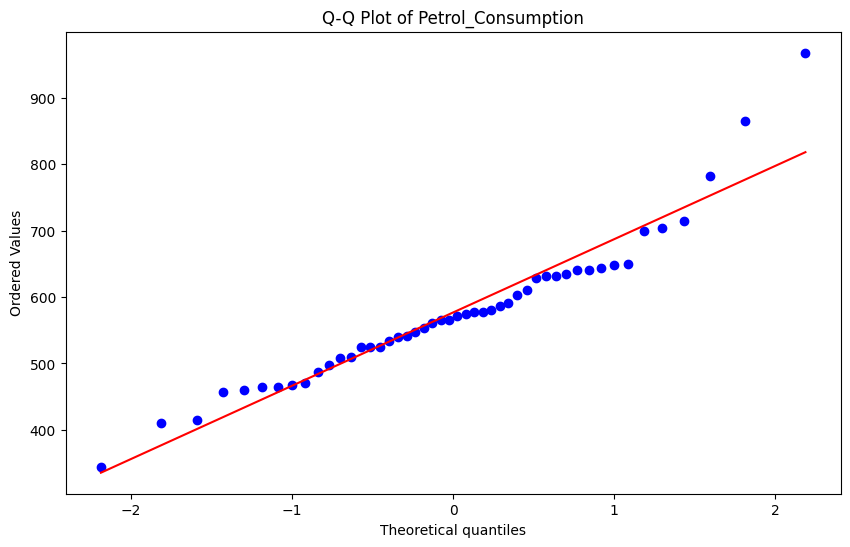

In [57]:
for col in df.columns:
    plt.figure(figsize=(10, 6))
    
    # Q-Q Plot
    plt.figure(figsize=(10, 6))
    probplot(df[col], dist="norm", plot=plt)
    plt.title(f'Q-Q Plot of {col}')

In [59]:
# Loop through each numeric column in the DataFrame
for col in df.columns:
   
    # Calculate Skewness and Kurtosis
    skewness = skew(df[col].dropna())
    kurt = kurtosis(df[col].dropna())
    
    print(f"Skewness of {col}: {skewness}")
    print(f"Kurtosis of {col}: {kurt}")
    
    # Shapiro-Wilk Test
    stat, p_value = shapiro(df[col].dropna())
    print(f"Shapiro-Wilk Test p-value for {col}: {p_value}")
    
    if p_value > 0.05:
        print(f"The {col} is likely normally distributed (fail to reject H0)\n")
    else:
        print(f"The {col} is not normally distributed (reject H0)\n")


Skewness of Petrol_tax: -2.827557202382455
Kurtosis of Petrol_tax: 13.33888742389638
Shapiro-Wilk Test p-value for Petrol_tax: 2.5055141961161098e-08
The Petrol_tax is not normally distributed (reject H0)

Skewness of Average_income: 0.12838746744699955
Kurtosis of Average_income: -0.8031878595028914
Shapiro-Wilk Test p-value for Average_income: 0.35898518562316895
The Average_income is likely normally distributed (fail to reject H0)

Skewness of Paved_Highways: 1.2102647854168302
Kurtosis of Paved_Highways: 2.709424360760785
Shapiro-Wilk Test p-value for Paved_Highways: 0.0055686128325760365
The Paved_Highways is not normally distributed (reject H0)

Skewness of Population_Driver_licence(%): 0.8943565651194172
Kurtosis of Population_Driver_licence(%): 0.3831845154560134
Shapiro-Wilk Test p-value for Population_Driver_licence(%): 0.009736740961670876
The Population_Driver_licence(%) is not normally distributed (reject H0)

Skewness of Petrol_Consumption: 1.0511556057696005
Kurtosis of 

**As the result of the histplot, Q-Q Plot, skewness, Kurtosis value, Shapiro_wilk Test P_vaue for all features, it is shown that only "Average_income" is the ony which is likely normaly distributed, rest of others are lef and right skewed.**

**To remove the fillna for normally distributed feature ''Average_income'' we will use fillna techique with mean value.**

In [62]:
#Normally Distributed
df['Average_income'].fillna(df['Average_income'].mean(), inplace=True)

**For skewed fetaures we will use fillna techique with median  value.**

In [66]:
#Skewed and conttiinuous so we fillna with medium
df['Paved_Highways'].fillna(df['Paved_Highways'].median(), inplace=True)
df['Population_Driver_licence(%)'].fillna(df['Population_Driver_licence(%)'].median(), inplace=True)

**After fillna techqniques it iis observed tha there are NaNs in the data_set now.**

In [67]:
df.isnull().sum()

Petrol_tax                      0
Average_income                  0
Paved_Highways                  0
Population_Driver_licence(%)    0
Petrol_Consumption              0
dtype: int64

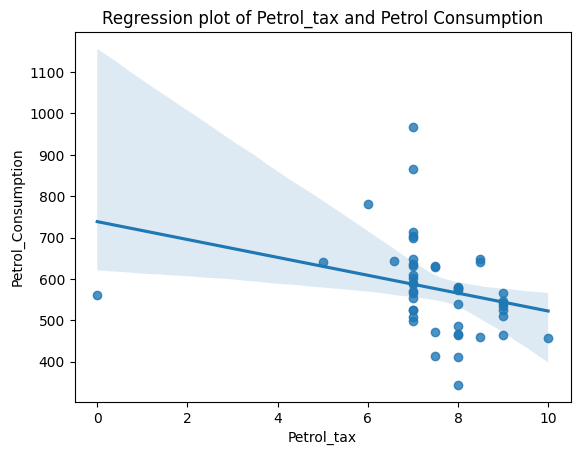

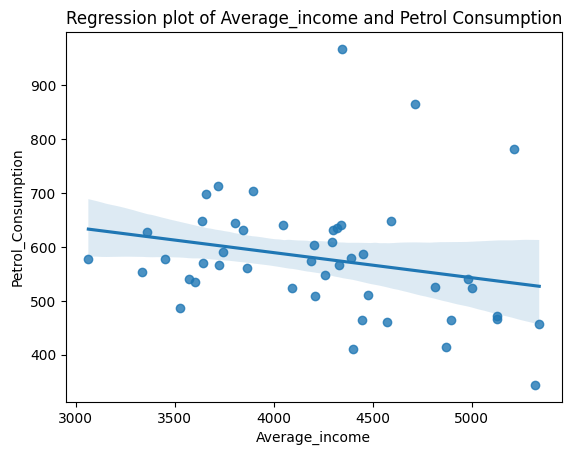

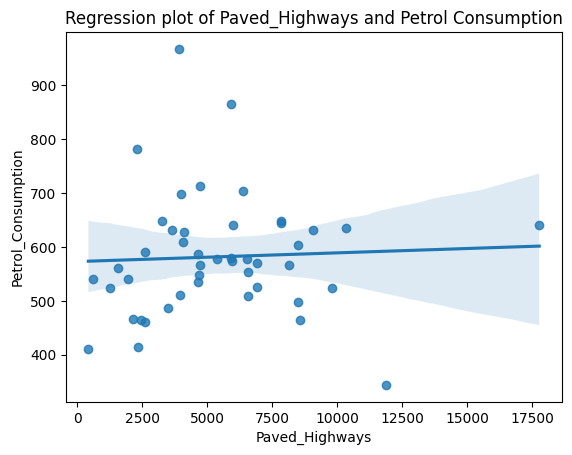

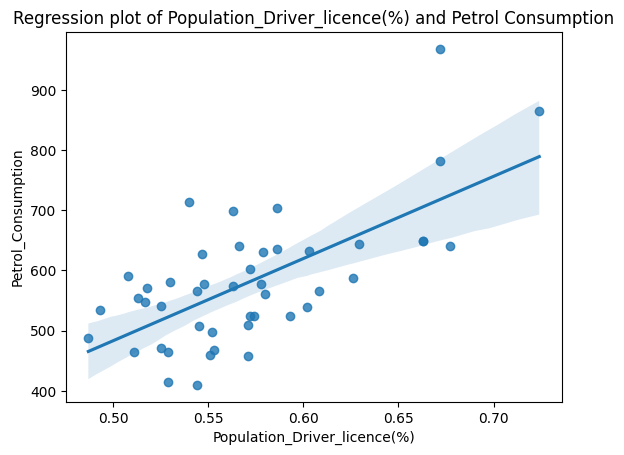

In [58]:
import seaborn as sns 
import matplotlib.pyplot as plt
variables = ['Petrol_tax', 'Average_income', 'Paved_Highways','Population_Driver_licence(%)']

for var in variables:
    plt.figure() # Creating a rectangle (figure) for each plot
    # Regression Plot also by default includes
    # best-fitting regression line
    # which can be turned off via `fit_reg=False`
    sns.regplot(x=var, y='Petrol_Consumption', data=df).set(title=f'Regression plot of {var} and Petrol Consumption');